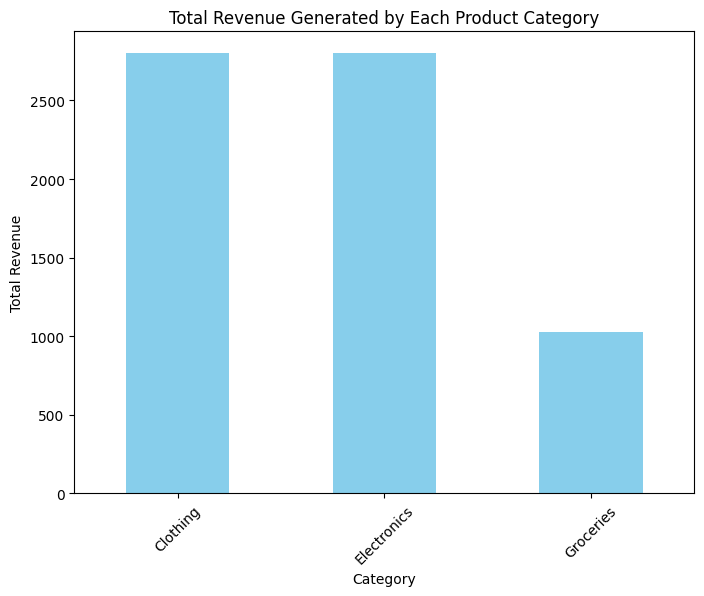

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample sales dataset
data = {
    'product_id': [1, 2, 3, 4, 5, 6],
    'category': ['Electronics', 'Clothing', 'Electronics', 'Groceries', 'Clothing', 'Groceries'],
    'store_id': [101, 102, 103, 104, 105, 106],
    'region': ['North', 'South', 'East', 'West', 'North', 'South'],
    'date': ['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-02', '2024-01-03', '2024-01-03'],
    'quantity': [10, 20, 15, 5, 30, 25],
    'price': [100, 50, 120, 30, 60, 35],
    'revenue': [1000, 1000, 1800, 150, 1800, 875]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Group by category and sum the revenue
revenue_by_category = df.groupby('category')['revenue'].sum()

# Create a bar chart
plt.figure(figsize=(8,6))
revenue_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Revenue Generated by Each Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


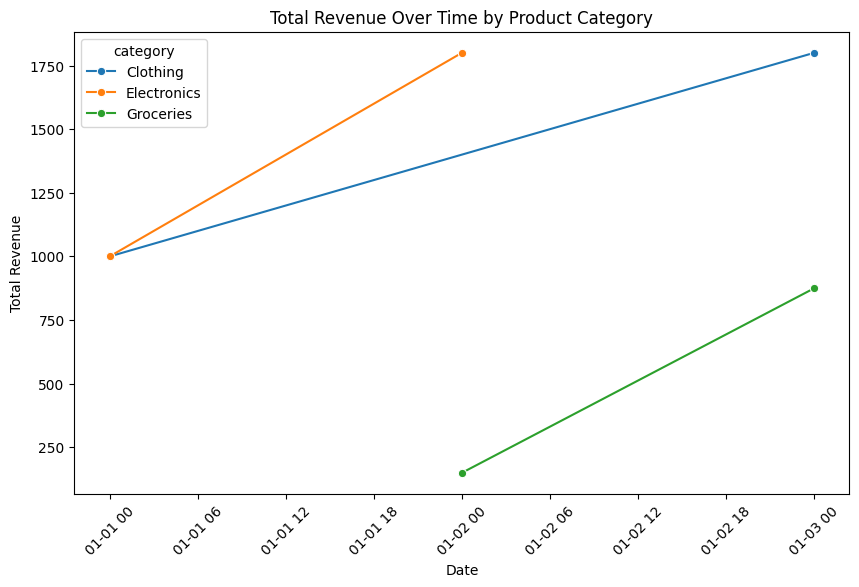

In [2]:
import seaborn as sns

def plot_revenue_over_time(df):
    # Convert 'date' to datetime
    df['date'] = pd.to_datetime(df['date'])
    
    # Group by date and category and sum the revenue
    revenue_by_date_category = df.groupby(['date', 'category'])['revenue'].sum().reset_index()
    
    # Create a line plot
    plt.figure(figsize=(10,6))
    sns.lineplot(x='date', y='revenue', hue='category', data=revenue_by_date_category, marker='o')
    plt.title('Total Revenue Over Time by Product Category')
    plt.xlabel('Date')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=45)
    plt.show()

# Call the function with the dataset
plot_revenue_over_time(df)


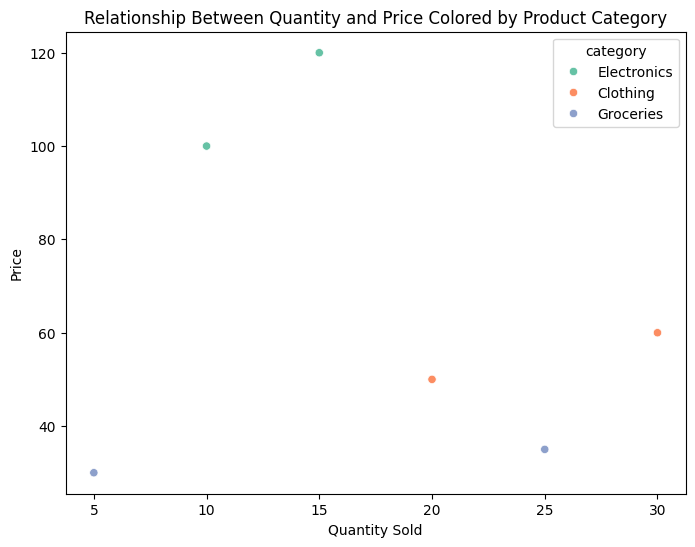

In [3]:
def scatter_quantity_price(df):
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='quantity', y='price', hue='category', data=df, palette='Set2')
    plt.title('Relationship Between Quantity and Price Colored by Product Category')
    plt.xlabel('Quantity Sold')
    plt.ylabel('Price')
    plt.show()

# Call the function with the dataset
scatter_quantity_price(df)


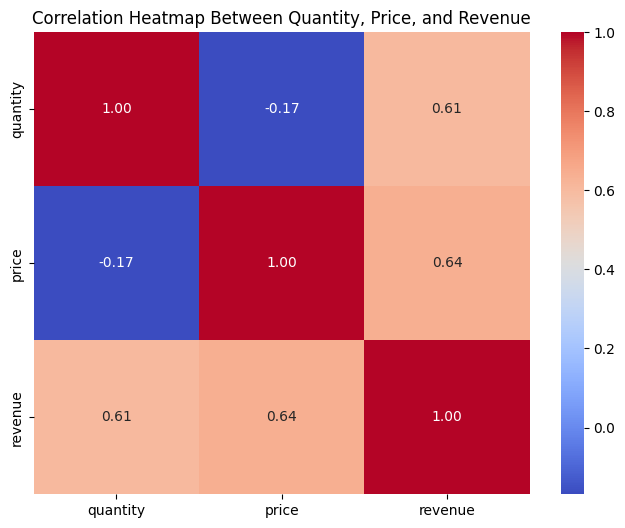

In [4]:
import seaborn as sns

def plot_heatmap(df):
    # Calculate correlation matrix
    correlation_matrix = df[['quantity', 'price', 'revenue']].corr()
    
    # Create a heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title('Correlation Heatmap Between Quantity, Price, and Revenue')
    plt.show()

# Call the function with the dataset
plot_heatmap(df)


TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x000001F3200DDF30>.

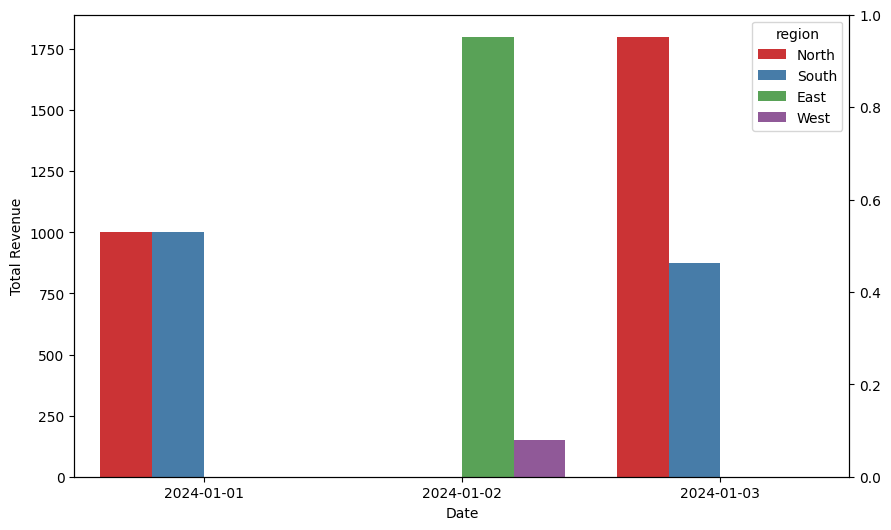

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def combination_chart(df):
    # Ensure 'date' is in datetime format
    df['date'] = pd.to_datetime(df['date'], errors='coerce')  # This will handle any invalid date format
    
    # Drop rows with invalid dates (NaT) if any
    df = df.dropna(subset=['date'])
    
    # Group by region and date, and calculate the sum of revenue and average price
    grouped_data = df.groupby(['date', 'region']).agg({'revenue': 'sum', 'price': 'mean'}).reset_index()
    
    # Create the figure
    fig, ax1 = plt.subplots(figsize=(10,6))
    
    # Create the bar chart for total revenue
    sns.barplot(x='date', y='revenue', hue='region', data=grouped_data, ax=ax1, palette='Set1')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Total Revenue')
    
    # Create a second y-axis for average price
    ax2 = ax1.twinx()
    sns.lineplot(x='date', y='price', hue='region', data=grouped_data, ax=ax2, marker='o', palette='Set2')
    ax2.set_ylabel('Average Price')
    
    # Set the title and show the plot
    plt.title('Total Revenue and Average Price by Region Over Time')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.tight_layout()  # Ensure everything fits without overlap
    plt.show()

# Sample dataset
data = {
    'product_id': [1, 2, 3, 4, 5, 6],
    'category': ['Electronics', 'Clothing', 'Electronics', 'Groceries', 'Clothing', 'Groceries'],
    'store_id': [101, 102, 103, 104, 105, 106],
    'region': ['North', 'South', 'East', 'West', 'North', 'South'],
    'date': ['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-02', '2024-01-03', '2024-01-03'],
    'quantity': [10, 20, 15, 5, 30, 25],
    'price': [100, 50, 120, 30, 60, 35],
    'revenue': [1000, 1000, 1800, 150, 1800, 875]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Call the function with the dataset
combination_chart(df)
